In [1]:
#Importing the necessary library.

from nltk.stem.snowball import SnowballStemmer
sn_stemmer=SnowballStemmer("english")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
df=pd.read_csv("MY_dataset.csv", encoding_errors= 'replace')

In [3]:
df

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT
0,national,partisan,policy,Representative,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,national,partisan,attack,Senator,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,national,neutral,support,Representative,twitter,Please join me today in remembering our fallen...
3,national,neutral,policy,Senator,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,national,partisan,policy,Senator,twitter,.@amazon delivery #drones show need to update ...
...,...,...,...,...,...,...
4995,national,partisan,support,Representative,facebook,I applaud Governor Perry�۪s recent decision to...
4996,national,partisan,policy,Representative,facebook,"Today, I voted in favor of H.R. 5016 - Financi..."
4997,national,neutral,policy,Representative,facebook,(Taken from posted WOKV interview) Congressm...
4998,national,neutral,media,Representative,facebook,Join me next week for a town hall in Ocala! I'...


In [4]:
def datacleaning(x):
#---------------------------------------------------------------------------------------------------------------------------    
    #Removing stop words.
    y=nltk.word_tokenize(x)
    temp=[]
    for i in y:
      if i in stopwords.words("english"): 
         pass
      else:
         temp.append(i)
    my_new_string=' '.join(temp)
#---------------------------------------------------------------------------------------------------------------------------        
    #Lemmatizing the data.
    c=nltk.word_tokenize(my_new_string)
    my_list=[]
    for i in c:
        my_list.append(lemmatizer.lemmatize(i))
    my_new_string_second=' '.join(my_list)
#---------------------------------------------------------------------------------------------------------------------------            
    #Stemming the data.
    d=nltk.word_tokenize(my_new_string_second)
    my_list_stemmer=[]
    for i in d:
        my_list_stemmer.append(sn_stemmer.stem(i))
    final=' '.join(my_list_stemmer)
#---------------------------------------------------------------------------------------------------------------------------  
    #Removing the numbers from the data.
    temp=[]
    for i in final:                       
      if i.isdigit(): 
         pass
      else:
        temp.append(i)
    hi=''.join(temp)
    hi_special=hi.lower() #Converting the data to lower case.
#---------------------------------------------------------------------------------------------------------------------------     
    #Removing the special characters from the data.
    my_list_special = [hi_special]
    temp_special=[]
    removetable = str.maketrans('', '', '~!`@#$%^&*()_-+={[}]|\:;?/>.<,}�۪')
    for i in my_list_special:
        temp_special.append(i.translate(removetable))
    hi_special_2=''.join(temp_special)
    return hi_special_2

In [5]:
df['CLEAN TEXT']=df['TEXT'].apply(datacleaning)

In [6]:
df

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT
0,national,partisan,policy,Representative,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,rt nowthisnew rep trey radel r fl slam o...
1,national,partisan,attack,Senator,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,video obamacar full higher cost broken prom...
2,national,neutral,support,Representative,twitter,Please join me today in remembering our fallen...,pleas join today rememb fallen hero honor men ...
3,national,neutral,policy,Senator,twitter,RT @SenatorLeahy: 1st step toward Senate debat...,rt senatorleahi st step toward senat debat l...
4,national,partisan,policy,Senator,twitter,.@amazon delivery #drones show need to update ...,amazon deliveri drone show need updat law p...
...,...,...,...,...,...,...,...
4995,national,partisan,support,Representative,facebook,I applaud Governor Perry�۪s recent decision to...,i applaud governor perry recent decis deploy n...
4996,national,partisan,policy,Representative,facebook,"Today, I voted in favor of H.R. 5016 - Financi...",today i vote favor hr financi servic gener...
4997,national,neutral,policy,Representative,facebook,(Taken from posted WOKV interview) Congressm...,taken post wokv interview congressman yoho s...
4998,national,neutral,media,Representative,facebook,Join me next week for a town hall in Ocala! I'...,join next week town hall ocala i ll answer qu...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#initializing the vector.
hi_vectorize = CountVectorizer()

In [8]:
hi_vectorize.fit(df['CLEAN TEXT'])

CountVectorizer()

In [9]:
X_vectors=hi_vectorize.transform(df['CLEAN TEXT'])

In [10]:
X_vectors

<5000x14119 sparse matrix of type '<class 'numpy.int64'>'
	with 90831 stored elements in Compressed Sparse Row format>

In [11]:
hi_vectorize.get_feature_names_out()[4100:4200]

array(['frowniegirl', 'frozen', 'fruit', 'fruitcak', 'frustrat', 'fryar',
       'fscdem', 'ft', 'ftc', 'ftk', 'ftlcitynew', 'ftmeademd', 'ftn',
       'ftw', 'fuel', 'fueleffici', 'fueron', 'fuert', 'fukushima',
       'fulfil', 'full', 'fuller', 'fullest', 'fullfledg', 'fulli',
       'fullpag', 'fullrep', 'fullstaff', 'fulltim', 'fun', 'function',
       'fund', 'fundament', 'fundrais', 'funds', 'funer', 'funnel',
       'funni', 'fur', 'furious', 'furlough', 'further', 'furthermor',
       'fuseactionpressroompressreleas', 'futur', 'futurelead', 'fuzzi',
       'fwd', 'fwdus', 'fwhcc', 'fwroundtabl', 'fxnwsepnsd', 'fy', 'fyi',
       'fyndaa', 'ga', 'gaba', 'gabbard', 'gabbardphotocontest',
       'gabbygifford', 'gabe', 'gabf', 'gabreski', 'gabriella', 'gaffney',
       'gai', 'gail', 'gain', 'gala', 'galella', 'galena', 'gall',
       'gallagh', 'gallardo', 'gallatin', 'galleri', 'gallia', 'gallina',
       'gallipoli', 'gallo', 'gallupnew', 'galuteria', 'galveston',
       'galv

# Visualisations

In [12]:
df['MESSAGE'].value_counts()

policy          1411
personal        1170
support          921
information      647
media            277
attack           172
constituency     152
mobilization     129
other            121
Name: MESSAGE, dtype: int64

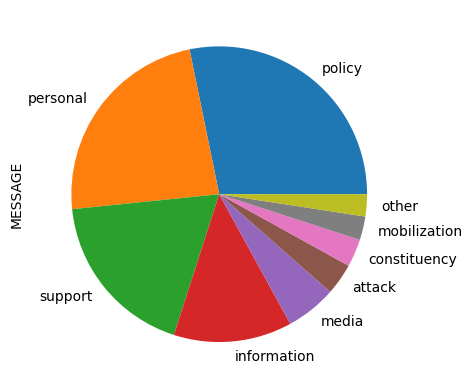

In [13]:
import matplotlib.pyplot as plt
pie_chart=df['MESSAGE'].value_counts().plot(kind='pie')

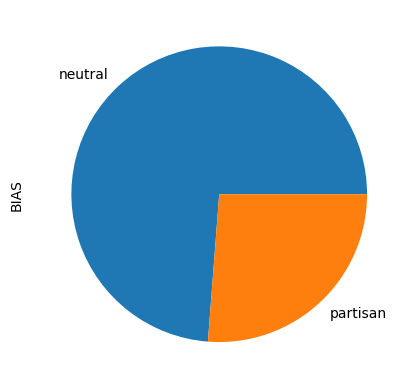

In [14]:
pie_chart=df['BIAS'].value_counts().plot(kind='pie')

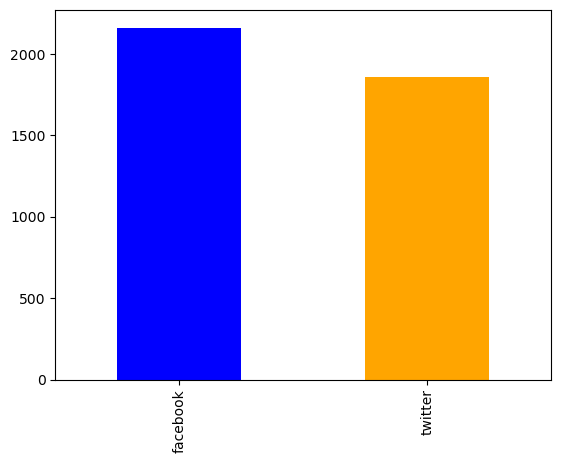

In [15]:
df_Representative=df[(df["DESIGNATION"] == 'Representative ')]
pie_chart=df_Representative['SOURCE'].value_counts().plot(kind='bar',color=['blue','orange'])

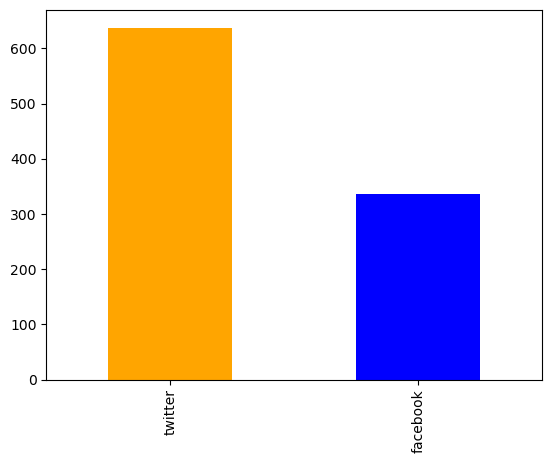

In [16]:
df_senator=df[(df["DESIGNATION"] == 'Senator ')]
pie_chart=df_senator['SOURCE'].value_counts().plot(kind='bar',color=['Orange','blue'])

<AxesSubplot:ylabel='DESIGNATION'>

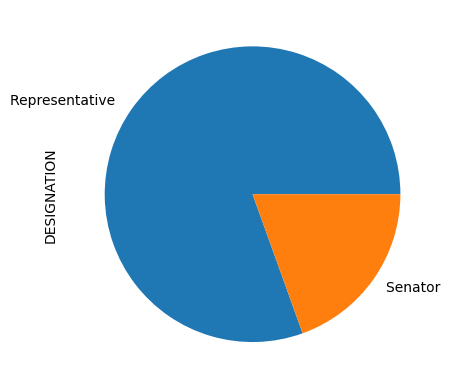

In [17]:
df['DESIGNATION'].value_counts().plot(kind='pie')

In [18]:
df

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT
0,national,partisan,policy,Representative,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,rt nowthisnew rep trey radel r fl slam o...
1,national,partisan,attack,Senator,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,video obamacar full higher cost broken prom...
2,national,neutral,support,Representative,twitter,Please join me today in remembering our fallen...,pleas join today rememb fallen hero honor men ...
3,national,neutral,policy,Senator,twitter,RT @SenatorLeahy: 1st step toward Senate debat...,rt senatorleahi st step toward senat debat l...
4,national,partisan,policy,Senator,twitter,.@amazon delivery #drones show need to update ...,amazon deliveri drone show need updat law p...
...,...,...,...,...,...,...,...
4995,national,partisan,support,Representative,facebook,I applaud Governor Perry�۪s recent decision to...,i applaud governor perry recent decis deploy n...
4996,national,partisan,policy,Representative,facebook,"Today, I voted in favor of H.R. 5016 - Financi...",today i vote favor hr financi servic gener...
4997,national,neutral,policy,Representative,facebook,(Taken from posted WOKV interview) Congressm...,taken post wokv interview congressman yoho s...
4998,national,neutral,media,Representative,facebook,Join me next week for a town hall in Ocala! I'...,join next week town hall ocala i ll answer qu...


# Clustering

In [19]:
from sklearn.cluster import KMeans
import numpy as np

In [20]:
# Initialising
km = KMeans(n_clusters=5)

In [21]:
# Fitting a model
km_model = km.fit(X_vectors)

In [22]:
# Making predictions
y_km = km.predict(X_vectors)

In [23]:
# Let's see our predictions
y_km[4000:5000]

array([0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1,
       2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [24]:
df['Cluster']=y_km

In [25]:
df

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT,Cluster
0,national,partisan,policy,Representative,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,rt nowthisnew rep trey radel r fl slam o...,2
1,national,partisan,attack,Senator,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,video obamacar full higher cost broken prom...,2
2,national,neutral,support,Representative,twitter,Please join me today in remembering our fallen...,pleas join today rememb fallen hero honor men ...,0
3,national,neutral,policy,Senator,twitter,RT @SenatorLeahy: 1st step toward Senate debat...,rt senatorleahi st step toward senat debat l...,0
4,national,partisan,policy,Senator,twitter,.@amazon delivery #drones show need to update ...,amazon deliveri drone show need updat law p...,2
...,...,...,...,...,...,...,...,...
4995,national,partisan,support,Representative,facebook,I applaud Governor Perry�۪s recent decision to...,i applaud governor perry recent decis deploy n...,0
4996,national,partisan,policy,Representative,facebook,"Today, I voted in favor of H.R. 5016 - Financi...",today i vote favor hr financi servic gener...,1
4997,national,neutral,policy,Representative,facebook,(Taken from posted WOKV interview) Congressm...,taken post wokv interview congressman yoho s...,2
4998,national,neutral,media,Representative,facebook,Join me next week for a town hall in Ocala! I'...,join next week town hall ocala i ll answer qu...,0


In [26]:
df[(df["Cluster"] == 4)]

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT,Cluster
4530,national,partisan,policy,Representative,facebook,As we await the President's speech tonight wit...,as await presid 's speech tonight regard execu...,4


In [27]:
km.labels_

array([2, 2, 0, ..., 2, 0, 0])

In [28]:
km.cluster_centers_

array([[0.00039185, 0.        , 0.00039185, ..., 0.0007837 , 0.00039185,
        0.00039185],
       [0.00274725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00048031, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

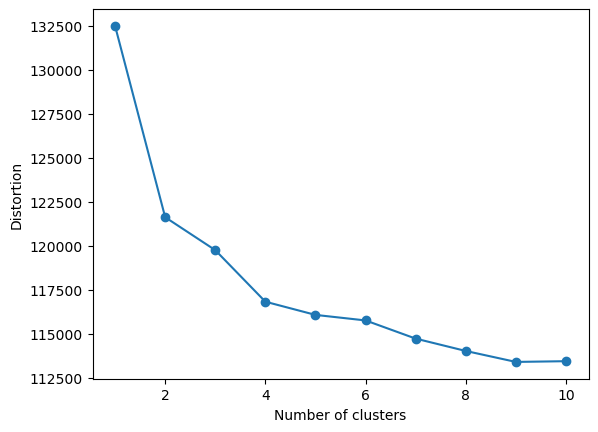

In [29]:
# calculate distortion for a range of number of cluster
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_vectors)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Word cloud

In [30]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [31]:
df['CLEAN TEXT']

0       rt  nowthisnew  rep trey radel  r  fl  slam  o...
1       video   obamacar  full higher cost broken prom...
2       pleas join today rememb fallen hero honor men ...
3       rt  senatorleahi  st step toward senat debat l...
4         amazon deliveri  drone show need updat law p...
                              ...                        
4995    i applaud governor perry recent decis deploy n...
4996    today  i vote favor hr    financi servic gener...
4997     taken post wokv interview  congressman yoho s...
4998    join next week town hall ocala  i ll answer qu...
4999    foreign affair committe hear syria  i remain o...
Name: CLEAN TEXT, Length: 5000, dtype: object

In [32]:
df['CLEAN TEXT'].values 

array(['rt  nowthisnew  rep trey radel  r  fl  slam  obamacar   polit http  tcozvywmgyih',
       'video   obamacar  full higher cost broken promis  http  tcodnvzqirwf',
       'pleas join today rememb fallen hero honor men woman current militari servic sacrific ',
       ...,
       " taken post wokv interview  congressman yoho say decis releas detaine exchang soldier us militari say walk away post afghanistan poor leadership  he also belief set bad preced   our enemi n't fear respect u i think respect import part   http  wwwwokvcomnewsnewslocalyohoairsconcernsguantanamoprisonerexchangengcsj",
       'join next week town hall ocala  i ll answer question might ',
       'foreign affair committe hear syria  i remain oppos militari intervent  alway will hear differ point view  this hear shed light refuge situat  check '],
      dtype=object)

In [33]:
str(df['CLEAN TEXT'].values)

'[\'rt  nowthisnew  rep trey radel  r  fl  slam  obamacar   polit http  tcozvywmgyih\'\n \'video   obamacar  full higher cost broken promis  http  tcodnvzqirwf\'\n \'pleas join today rememb fallen hero honor men woman current militari servic sacrific \'\n ...\n " taken post wokv interview  congressman yoho say decis releas detaine exchang soldier us militari say walk away post afghanistan poor leadership  he also belief set bad preced   our enemi n\'t fear respect u i think respect import part   http  wwwwokvcomnewsnewslocalyohoairsconcernsguantanamoprisonerexchangengcsj"\n \'join next week town hall ocala  i ll answer question might \'\n \'foreign affair committe hear syria  i remain oppos militari intervent  alway will hear differ point view  this hear shed light refuge situat  check \']'

In [34]:
text_array = df['CLEAN TEXT'].values 

In [35]:
text = str(text_array)

In [36]:
stopwords = set(STOPWORDS)

In [37]:
WordCloud(background_color="white").generate(text)

In [38]:
wordcloud = WordCloud(background_color="white").generate(text)

In [39]:
wordcloud = WordCloud(stopwords=stopwords, background_color="red").generate(str(text))

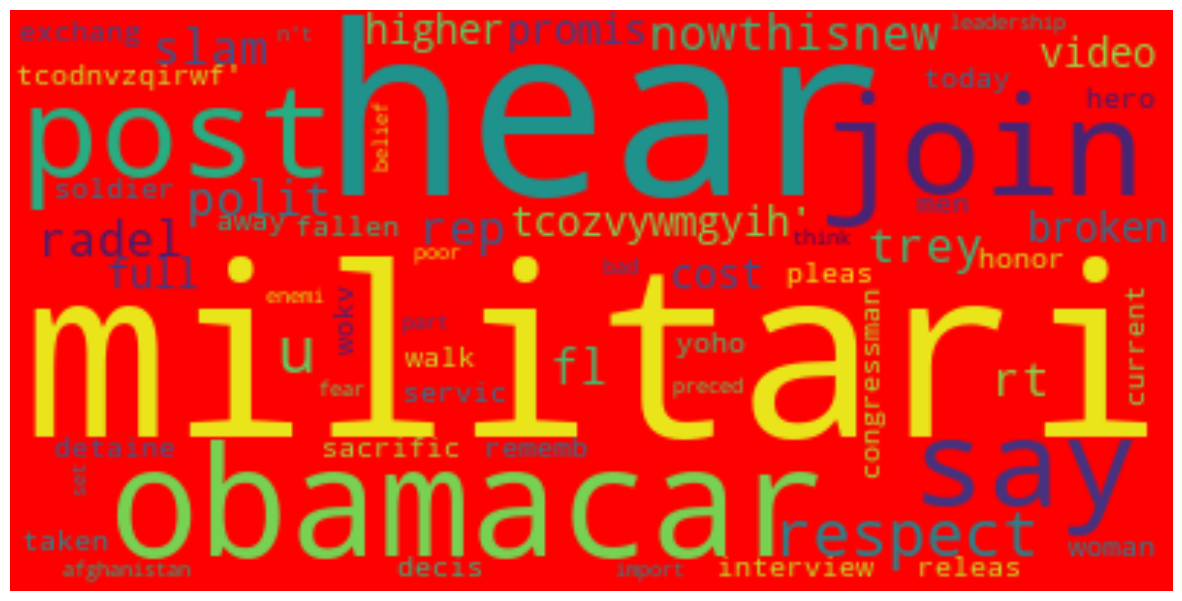

In [40]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# As a senator I want to write a support message to the national audience.
df_sen_sup_nat = df[(df['DESIGNATION'] == 'Senator ') & (df['MESSAGE'] == 'support') & (df['AUDIENCE'] == 'national')]

In [42]:
df_sen_sup_nat

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT,Cluster
20,national,neutral,support,Senator,twitter,A great look back at at Idaho Native American ...,a great look back idaho nativ american tribe ...,2
25,national,partisan,support,Senator,twitter,This wk�۪s 1 min video is on how expanding Med...,this wks min video expand medicaid wv help m...,2
50,national,neutral,support,Senator,twitter,Promising @FannieMae is paying back more $ to ...,promis fanniema pay back us taxpay reinforc...,0
126,national,neutral,support,Senator,twitter,Congratulations to Sally Jewell for being offi...,congratul salli jewel offici sworn new interi...,2
148,national,neutral,support,Senator,twitter,#RyanBudget hurts everyone in this country. Wh...,ryanbudget hurt everyon countri when come me...,0
...,...,...,...,...,...,...,...,...
4649,national,neutral,support,Senator,facebook,I'll be joining Newt Gingrich and Van Jones on...,i ll join newt gingrich van jone crossfir toni...,0
4749,national,neutral,support,Senator,facebook,Kris and I are praying for the families in Elk...,kris i pray famili elk counti affect week seve...,0
4816,national,neutral,support,Senator,facebook,"Last week, I was proud to return to New Mexico...",last week i proud return new mexico deliv key...,2
4850,national,neutral,support,Senator,facebook,Wicker Report | The Obama Administration has a...,wicker report the obama administr habit miss ...,1


In [43]:
df_sen_sup_nat['CLEAN TEXT']
df_sen_sup_nat['CLEAN TEXT'].values 
str(df_sen_sup_nat['CLEAN TEXT'].values)
text_array = df_sen_sup_nat['CLEAN TEXT'].values 
text = str(text_array)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stopwords, background_color="pink").generate(str(text))

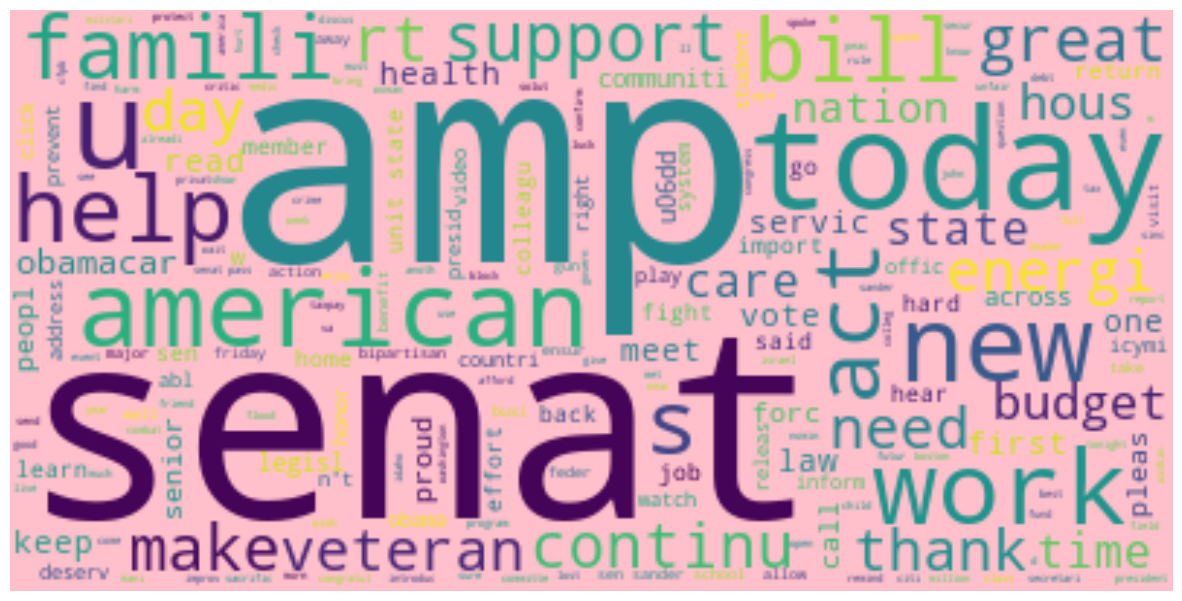

In [44]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
# As a Representative I want to tweet a policy message.
df_rep_pol_tw = df[(df['DESIGNATION'] == 'Representative ') & (df['MESSAGE'] == 'policy') & (df['SOURCE'] == 'twitter')]

In [46]:
df_rep_pol_tw

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT,Cluster
0,national,partisan,policy,Representative,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,rt nowthisnew rep trey radel r fl slam o...,2
10,national,partisan,policy,Representative,twitter,"As POTUS golfs, pushes amnesty &amp; ignores K...",as potus golf push amnesti amp ignor keysto...,2
22,national,neutral,policy,Representative,twitter,RT if you agree: It's time to #ActOnClimate ch...,rt agre it 's time actonclim chang info nc...,2
23,national,neutral,policy,Representative,twitter,We will vote on the Working Families Flexibili...,we vote work famili flexibl act would like fl...,0
31,national,partisan,policy,Representative,twitter,"MUST READ from @marcthiessen -- ""Kidnapped Lib...",must read marcthiessen kidnap libyan prime ...,2
...,...,...,...,...,...,...,...,...
2489,national,partisan,policy,Representative,twitter,@BornEricG you mean legalizing those here ille...,bornericg mean legal illeg would attract ten...,0
2490,national,neutral,policy,Representative,twitter,.@iHealthBeat and @MobiHealthNews covered my #...,ihealthbeat mobihealthnew cover telehealth...,2
2492,national,partisan,policy,Representative,twitter,The WH gives big biz yet ANOTHER break from #O...,the wh give big biz yet anoth break obamacar ...,2
2495,national,neutral,policy,Representative,twitter,"Wow, you've got to watch this ���12-year-old c...",wow ve got watch yearold chastis nc republica...,2


In [47]:
df_rep_pol_tw['CLEAN TEXT']
df_rep_pol_tw['CLEAN TEXT'].values 
str(df_rep_pol_tw['CLEAN TEXT'].values)
text_array = df_rep_pol_tw['CLEAN TEXT'].values 
text = str(text_array)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stopwords, background_color="blue").generate(str(text))

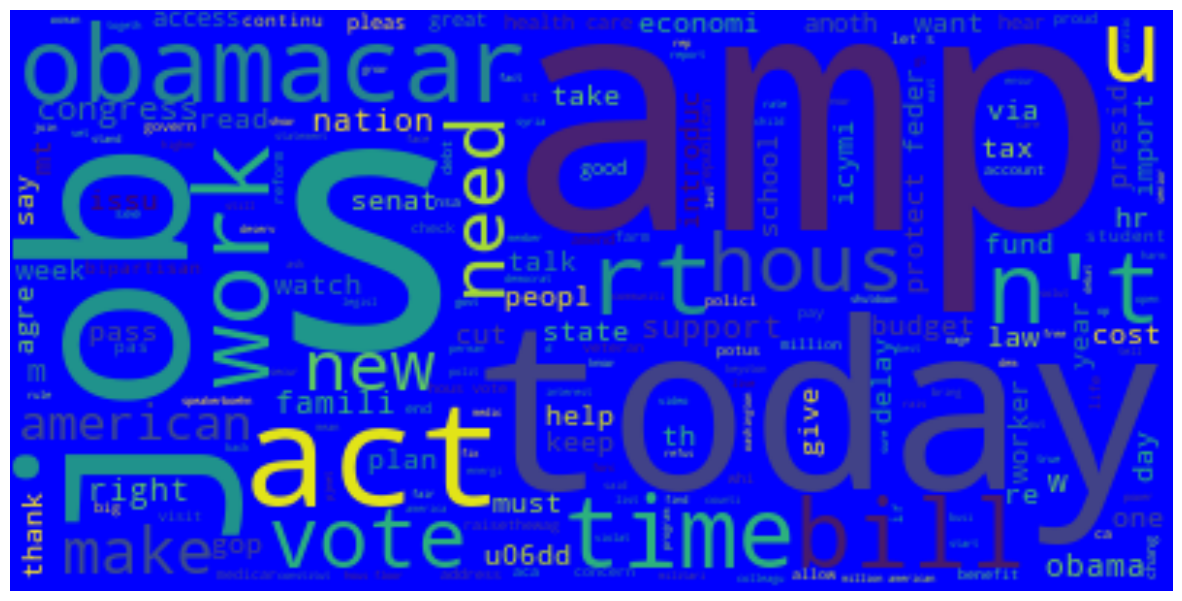

In [48]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
# As a senator I want to sound neutral while messaging on facebook.
df_sen_new_fc = df[(df['DESIGNATION'] == 'Senator ') & (df['BIAS'] == 'neutral') & (df['SOURCE'] == 'facebook')]

In [50]:
df_sen_new_fc

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT,Cluster
2502,national,neutral,support,Senator,facebook,"This morning, Sen. Alexander met with Allyssa ...",this morn sen alexand met allyssa de jong pa...,0
2503,national,neutral,policy,Senator,facebook,ICYMI: Sen. Alexander on Saturday delivered th...,icymi sen alexand saturday deliv week republi...,1
2504,national,neutral,policy,Senator,facebook,"ICYMI: On the Senate floor yesterday, Sen. Ale...",icymi on senat floor yesterday sen alexand c...,2
2517,national,neutral,policy,Senator,facebook,Senator Ayotte released the following statemen...,senat ayott releas follow statement regard dep...,1
2538,national,neutral,policy,Senator,facebook,Approximately one in four adults suffers from ...,approxim one four adult suffer diagnos mental ...,1
...,...,...,...,...,...,...,...,...
4888,national,neutral,personal,Senator,facebook,I was so proud to join Rhode Island Housing an...,i proud join rhode island hous partner today c...,1
4889,national,neutral,personal,Senator,facebook,Witnessed history in Rhode Island today! Gover...,wit histori rhode island today governor linco...,0
4893,constituency,neutral,information,Senator,facebook,Visited Northern Virginia Community College th...,visit northern virginia communiti colleg morn ...,0
4895,national,neutral,personal,Senator,facebook,Congratulations to Janet Yellen! Proud to vote...,congratul janet yellen proud vote today confi...,0


In [51]:
df_sen_new_fc['CLEAN TEXT']
df_sen_new_fc['CLEAN TEXT'].values 
str(df_sen_new_fc['CLEAN TEXT'].values)
text_array = df_sen_new_fc['CLEAN TEXT'].values 
text = str(text_array)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(str(text))

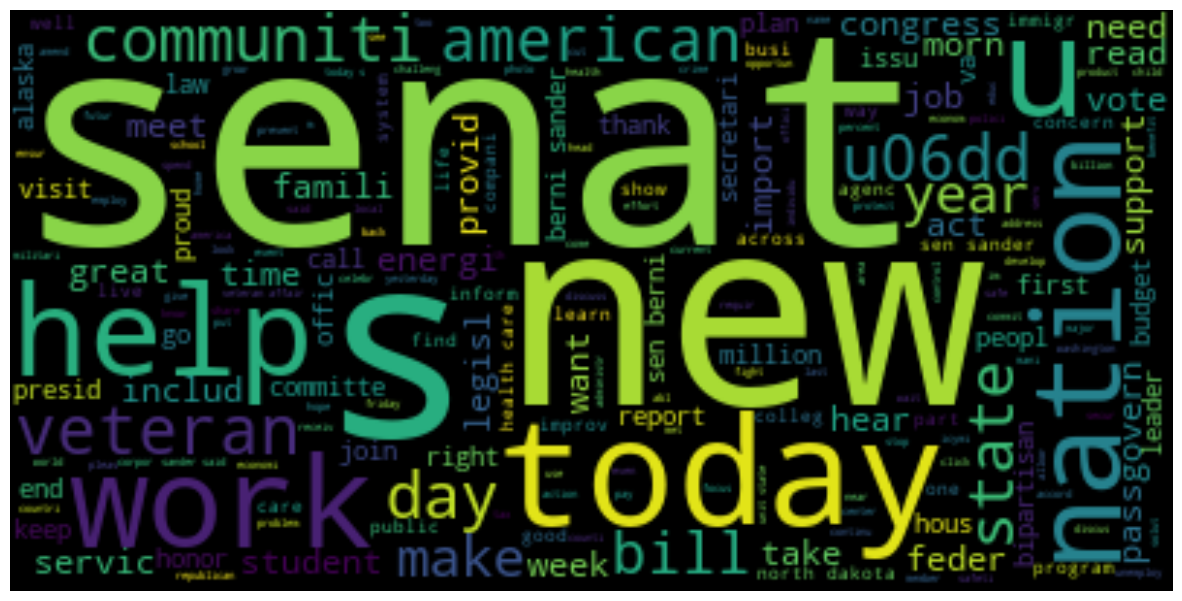

In [52]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
# I want to attack somebody.
df_attk = df[(df['MESSAGE'] == 'attack')]

In [54]:
df_attk

,AUDIENCE,BIAS,MESSAGE,DESIGNATION,SOURCE,TEXT,CLEAN TEXT,Cluster
1,national,partisan,attack,Senator,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,video obamacar full higher cost broken prom...,2
11,national,partisan,attack,Representative,twitter,The President doesn�۪t get to just decide he d...,the presid doesnt get decid doesnt like congre...,2
27,national,partisan,attack,Representative,twitter,Remember Bill? He and his friends are stuck on...,rememb bill he friend stuck senatorreid 's d...,2
30,national,partisan,attack,Representative,twitter,"#Obamacare spawning a new concept: ""medical ho...",obamacar spawn new concept medic homeless ...,2
55,national,partisan,attack,Representative,twitter,Demandar�� Obama un recuento en #Venezuela? Cr...,demandar obama un recuento en venezuela creo...,2
...,...,...,...,...,...,...,...,...
4621,national,partisan,attack,Representative,facebook,By delaying another component of his signature...,by delay anoth compon signatur law select pre...,0
4644,national,partisan,attack,Representative,facebook,NUMBER OF THE DAY: 1. It's been 1 year today s...,number of the day it 's year today sinc su...,1
4843,national,partisan,attack,Representative,facebook,"#Obamacare passed because a ""lack of transpare...",obamacar pass lack transpar stupid america...,0
4860,national,partisan,attack,Representative,facebook,Even members of his own party are frustrated w...,even member parti frustrat obama lack concern ...,2


In [55]:
df_attk['CLEAN TEXT']
df_attk['CLEAN TEXT'].values 
str(df_attk['CLEAN TEXT'].values)
text_array = df_attk['CLEAN TEXT'].values 
text = str(text_array)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stopwords, background_color="red").generate(str(text))

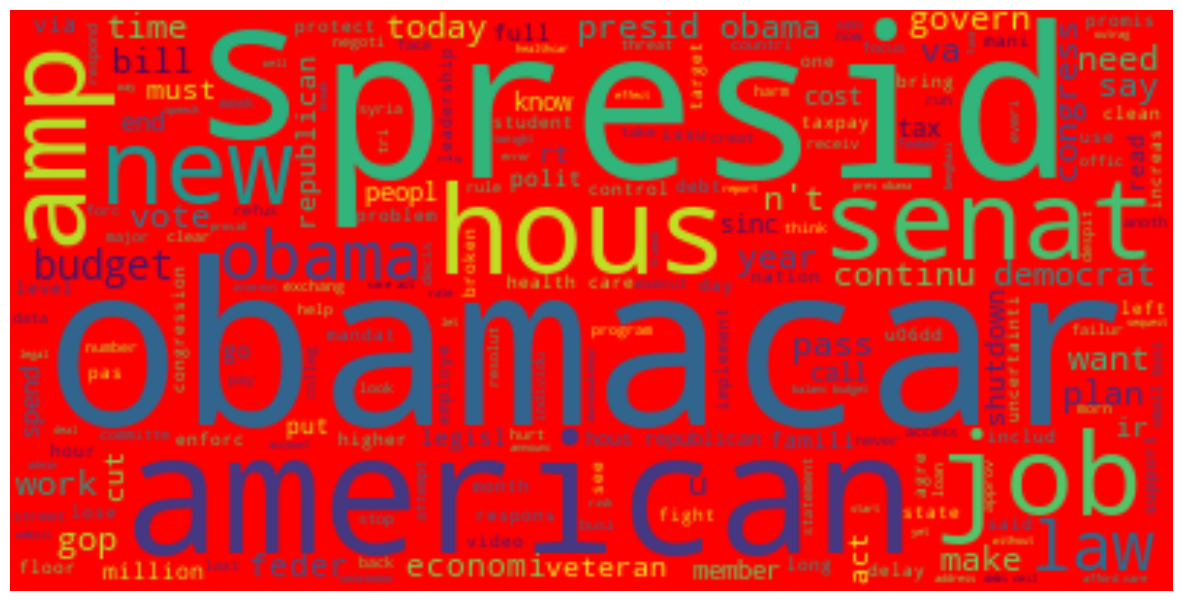

In [56]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Train test split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
df_x = df['CLEAN TEXT']

In [59]:
df_x

0       rt  nowthisnew  rep trey radel  r  fl  slam  o...
1       video   obamacar  full higher cost broken prom...
2       pleas join today rememb fallen hero honor men ...
3       rt  senatorleahi  st step toward senat debat l...
4         amazon deliveri  drone show need updat law p...
                              ...                        
4995    i applaud governor perry recent decis deploy n...
4996    today  i vote favor hr    financi servic gener...
4997     taken post wokv interview  congressman yoho s...
4998    join next week town hall ocala  i ll answer qu...
4999    foreign affair committe hear syria  i remain o...
Name: CLEAN TEXT, Length: 5000, dtype: object

In [60]:
df_y_MESSAGE = df['MESSAGE']

In [61]:
df_y_MESSAGE

0        policy
1        attack
2       support
3        policy
4        policy
         ...   
4995    support
4996     policy
4997     policy
4998      media
4999    support
Name: MESSAGE, Length: 5000, dtype: object

In [62]:
X_train, X_test, y_train_MESSAGE, y_test_MESSAGE = train_test_split(df_x, df_y_MESSAGE, test_size=0.33, random_state=42)

In [63]:
X_test

1501    speak hous floor tonight honor friend  amp  me...
2586                 i urg continu pray peopl west  texa 
2653    look forward particip debat regard cbc altern ...
1055    as social worker  i know impact teacher life c...
705     rt  robrobinson  way go  nashvill    via  usat...
                              ...                        
908     read latest op effort halt irs effort stifl fr...
2114    recent grad find unabl particip economi due mo...
3896    onc upon a time  gop chang hous rule guarante ...
1627    whi peopl lose insur get   asksebelius http  t...
2873    congress respons  now must act  http  wwwnytim...
Name: CLEAN TEXT, Length: 1650, dtype: object

In [64]:
train_test_split(df_x, df_y_MESSAGE, test_size=0.33, random_state=42) # x_train, x_test, y_train, y_test.

[1522    johnni matheni red hous show latest  darpa pro...
 835     good news economi consum confid hit highest le...
 358     share think texa  expandmedicaidnow rt http  t...
 138       school shoot nation 's norm  http  tcovecosersb
 299     great news  suprem court upheld marriag equal ...
                               ...                        
 4426                         the presid act alon  immigr 
 466     here go  transportationh bill latest grossli u...
 3092     activ road  transit project wa state slow sto...
 3772    presid obama execut action bring fair account ...
 860     so proud honor  dochast  dear friend  amp  col...
 Name: CLEAN TEXT, Length: 3350, dtype: object,
 1501    speak hous floor tonight honor friend  amp  me...
 2586                 i urg continu pray peopl west  texa 
 2653    look forward particip debat regard cbc altern ...
 1055    as social worker  i know impact teacher life c...
 705     rt  robrobinson  way go  nashvill    via  usat...
        

In [65]:
X_train

1522    johnni matheni red hous show latest  darpa pro...
835     good news economi consum confid hit highest le...
358     share think texa  expandmedicaidnow rt http  t...
138       school shoot nation 's norm  http  tcovecosersb
299     great news  suprem court upheld marriag equal ...
                              ...                        
4426                         the presid act alon  immigr 
466     here go  transportationh bill latest grossli u...
3092     activ road  transit project wa state slow sto...
3772    presid obama execut action bring fair account ...
860     so proud honor  dochast  dear friend  amp  col...
Name: CLEAN TEXT, Length: 3350, dtype: object

In [66]:
X_test

1501    speak hous floor tonight honor friend  amp  me...
2586                 i urg continu pray peopl west  texa 
2653    look forward particip debat regard cbc altern ...
1055    as social worker  i know impact teacher life c...
705     rt  robrobinson  way go  nashvill    via  usat...
                              ...                        
908     read latest op effort halt irs effort stifl fr...
2114    recent grad find unabl particip economi due mo...
3896    onc upon a time  gop chang hous rule guarante ...
1627    whi peopl lose insur get   asksebelius http  t...
2873    congress respons  now must act  http  wwwnytim...
Name: CLEAN TEXT, Length: 1650, dtype: object

In [67]:
y_train_MESSAGE

1522         support
835          support
358     mobilization
138           policy
299      information
            ...     
4426         support
466      information
3092          policy
3772          policy
860         personal
Name: MESSAGE, Length: 3350, dtype: object

In [68]:
y_test_MESSAGE

1501         support
2586         support
2653        personal
1055        personal
705     constituency
            ...     
908     mobilization
2114          policy
3896          attack
1627          policy
2873          policy
Name: MESSAGE, Length: 1650, dtype: object

# Splitting on actual data

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# We initialise it
vectorizer = CountVectorizer()

vectorizer.fit(X_train)

CountVectorizer()

In [70]:
vectorizer.transform(X_train)

<3350x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 61918 stored elements in Compressed Sparse Row format>

In [71]:
vectorizer.get_feature_names_out()[0:100]

array(['aaa', 'aaasnew', 'aamina', 'aanacounti', 'aaoe', 'aapi',
       'aapiscir', 'aaron', 'aarondiam', 'aauw', 'ab', 'abandon', 'abba',
       'abbevill', 'abbot', 'abc', 'abcnew',
       'abcnewsgocomentertainmentamericanidolrecapcalebjohnsontriumphsjenairenestori',
       'abcnewsgocomthisweek', 'abduct', 'abel', 'aberdeen', 'abet',
       'abetterway', 'abhorr', 'abid', 'abigail', 'abil', 'abilen', 'abl',
       'ableact', 'abod', 'abolish', 'abort', 'about', 'abov', 'abroad',
       'absenc', 'absolut', 'absorb', 'absurd', 'abt', 'abund', 'abus',
       'abusivo', 'ac', 'aca', 'academ', 'academi', 'academy', 'acadia',
       'acarep', 'acat', 'acawork', 'accept', 'access', 'accid',
       'accommod', 'accomplish', 'accord', 'account', 'accountable',
       'accredit', 'accumul', 'accur', 'ace', 'ach', 'achiev',
       'acknowledg', 'acognew', 'acosta', 'acquisit', 'acr', 'across',
       'acrosstheboard', 'act', 'action', 'actionnewsjax', 'activ',
       'actividad', 'activist',

In [72]:
X_train_vector = vectorizer.transform(X_train)

In [73]:
vectorizer.transform(X_test)

<1650x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 25592 stored elements in Compressed Sparse Row format>

In [74]:
X_test_vector = vectorizer.transform(X_test)

# Encoding the categories

In [75]:
from sklearn.preprocessing import LabelEncoder
le_MESSAGE = LabelEncoder()
from sklearn import preprocessing
le_preprocessing_MESSAGE = preprocessing.LabelEncoder()

In [76]:
y_train_MESSAGE[50:100]

2369        personal
3728          policy
910            other
124           attack
2572          policy
1586     information
1257    mobilization
3441          policy
3480          policy
4108          policy
1178     information
3463          policy
3469        personal
3467          policy
2103     information
442          support
2227         support
4416          policy
925            media
4020         support
2145         support
4770          policy
1411          attack
3466     information
2072          policy
1509         support
1227          policy
4072          policy
2585    mobilization
4450          policy
2951     information
3885         support
324      information
3977        personal
3576     information
2211         support
3298          policy
3035         support
1498         support
1502    constituency
1006         support
4179        personal
3013          policy
3516        personal
1467     information
1225           media
3167        personal
2267         

In [77]:
le_MESSAGE.fit(y_train_MESSAGE)

LabelEncoder()

In [78]:
le_preprocessing_MESSAGE.fit(y_train_MESSAGE)
le_preprocessing_MESSAGE.fit(y_test_MESSAGE)

LabelEncoder()

In [79]:
le_MESSAGE.transform(y_train_MESSAGE)[50:100]

array([6, 7, 5, 0, 7, 2, 4, 7, 7, 7, 2, 7, 6, 7, 2, 8, 8, 7, 3, 8, 8, 7,
       0, 2, 7, 8, 7, 7, 4, 7, 2, 8, 2, 6, 2, 8, 7, 8, 8, 1, 8, 6, 7, 6,
       2, 3, 6, 7, 2, 8])

In [80]:
le_MESSAGE.classes_

array(['attack', 'constituency', 'information', 'media', 'mobilization',
       'other', 'personal', 'policy', 'support'], dtype=object)

In [81]:
le_MESSAGE.transform(y_train_MESSAGE)[1:50]

array([8, 4, 7, 2, 6, 7, 7, 0, 1, 8, 7, 7, 3, 6, 8, 7, 5, 4, 6, 7, 7, 6,
       5, 7, 2, 7, 6, 6, 2, 7, 8, 5, 7, 2, 8, 8, 3, 7, 7, 6, 3, 6, 3, 7,
       1, 2, 6, 7, 7])

In [82]:
y_train_encoded_MESSAGE = le_MESSAGE.transform(y_train_MESSAGE)

In [83]:
y_test_encoded_MESSAGE = le_MESSAGE.transform(y_test_MESSAGE)

In [84]:
prediction_decoded_MESSAGE = le_preprocessing_MESSAGE.inverse_transform(y_train_encoded_MESSAGE)
print(prediction_decoded_MESSAGE)

['support' 'support' 'mobilization' ... 'policy' 'policy' 'personal']


In [85]:
y_test_decoded_MESSAGE = le_preprocessing_MESSAGE.inverse_transform(y_test_encoded_MESSAGE)
print(y_test_decoded_MESSAGE)

['support' 'support' 'personal' ... 'attack' 'policy' 'policy']


# Finally training the model

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
# Initialising
lr_MESSAGE=LogisticRegression()

In [88]:
#Fitting the model for Bag of words
lr_model_MESSAGE = lr_MESSAGE.fit(X_train_vector,prediction_decoded_MESSAGE)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
print(lr_model_MESSAGE)

LogisticRegression()


In [90]:
#Predicting the model for bag of words
lr_MESSAGE.predict(X_test_vector)

array(['personal', 'personal', 'attack', ..., 'support', 'policy',
       'policy'], dtype=object)

In [91]:
lr_model_predicted_MESSAGE = lr_MESSAGE.predict(X_test_vector)

In [92]:
lr_model_predicted_MESSAGE

array(['personal', 'personal', 'attack', ..., 'support', 'policy',
       'policy'], dtype=object)

In [93]:
y_test_encoded_MESSAGE

array([8, 8, 6, ..., 0, 7, 7])

In [94]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test_decoded_MESSAGE,lr_model_predicted_MESSAGE)

0.3278787878787879

In [96]:
lr_model_score_MESSAGE = accuracy_score(y_test_decoded_MESSAGE,lr_model_predicted_MESSAGE)

In [97]:
print("lr_bow_score :",lr_model_score_MESSAGE)

lr_bow_score : 0.3278787878787879


# Predicting the text.

In [98]:
# Let's write some text
ourtext = ['we appretiate the move by the government']
vectorizer.transform(ourtext)
ourtext_vector = vectorizer.transform(ourtext)
lr_MESSAGE.predict(ourtext_vector)

array(['information'], dtype=object)

In [99]:
vectorizer.transform(ourtext)

<1x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [100]:
ourtext_vector = vectorizer.transform(ourtext)

In [101]:
lr_MESSAGE.predict(ourtext_vector)

array(['information'], dtype=object)

# predicting the source

In [102]:
df_y_SOURCE = df['SOURCE']

In [103]:
X_train, X_test, y_train_SOURCE, y_test_SOURCE = train_test_split(df_x, df_y_SOURCE, test_size=0.33, random_state=42)

In [104]:
train_test_split(df_x, df_y_SOURCE, test_size=0.33, random_state=42) # x_train, x_test, y_train, y_test.

[1522    johnni matheni red hous show latest  darpa pro...
 835     good news economi consum confid hit highest le...
 358     share think texa  expandmedicaidnow rt http  t...
 138       school shoot nation 's norm  http  tcovecosersb
 299     great news  suprem court upheld marriag equal ...
                               ...                        
 4426                         the presid act alon  immigr 
 466     here go  transportationh bill latest grossli u...
 3092     activ road  transit project wa state slow sto...
 3772    presid obama execut action bring fair account ...
 860     so proud honor  dochast  dear friend  amp  col...
 Name: CLEAN TEXT, Length: 3350, dtype: object,
 1501    speak hous floor tonight honor friend  amp  me...
 2586                 i urg continu pray peopl west  texa 
 2653    look forward particip debat regard cbc altern ...
 1055    as social worker  i know impact teacher life c...
 705     rt  robrobinson  way go  nashvill    via  usat...
        

In [105]:
from sklearn.preprocessing import LabelEncoder
le_SOURCE = LabelEncoder()
from sklearn import preprocessing
le_preprocessing_SOURCE = preprocessing.LabelEncoder()

In [106]:
le_SOURCE.fit(y_train_SOURCE)

LabelEncoder()

In [107]:
le_preprocessing_SOURCE.fit(y_train_SOURCE)
le_preprocessing_SOURCE.fit(y_test_SOURCE)

LabelEncoder()

In [108]:
y_train_SOURCE[1:20]

835      twitter
358      twitter
138      twitter
299      twitter
1556     twitter
1003     twitter
382      twitter
941      twitter
4446    facebook
4854    facebook
761      twitter
1705     twitter
1873     twitter
2550    facebook
2086     twitter
2197     twitter
898      twitter
3999    facebook
3615    facebook
Name: SOURCE, dtype: object

In [109]:
le_SOURCE.transform(y_train_SOURCE)[1:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [110]:
le_SOURCE.classes_

array(['facebook', 'twitter'], dtype=object)

In [111]:
le_SOURCE.transform(y_train_SOURCE)[1:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1])

In [112]:
y_train_encoded_SOURCE = le_SOURCE.transform(y_train_SOURCE)

In [113]:
y_test_encoded_SOURCE = le_SOURCE.transform(y_test_SOURCE)

In [114]:
prediction_decoded_SOURCE = le_preprocessing_SOURCE.inverse_transform(y_train_encoded_SOURCE)
print(prediction_decoded_SOURCE)

['twitter' 'twitter' 'twitter' ... 'facebook' 'facebook' 'twitter']


In [115]:
y_test_decoded_SOURCE = le_preprocessing_SOURCE.inverse_transform(y_test_encoded_SOURCE)
print(y_test_decoded_SOURCE)

['twitter' 'facebook' 'facebook' ... 'facebook' 'twitter' 'facebook']


Finally training the model-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
# Initialising
lr_SOURCE=LogisticRegression()

In [118]:
#Fitting the model for Bag of words
lr_model_SOURCE = lr_SOURCE.fit(X_train_vector,prediction_decoded_SOURCE)

In [119]:
print(lr_model_SOURCE)

LogisticRegression()


In [120]:
#Predicting the model for a bag of words.
lr_SOURCE.predict(X_test_vector)

array(['twitter', 'twitter', 'twitter', ..., 'twitter', 'twitter',
       'twitter'], dtype=object)

In [121]:
lr_model_predicted_SOURCE=lr_SOURCE.predict(X_test_vector)

In [122]:
lr_model_predicted_SOURCE

array(['twitter', 'twitter', 'twitter', ..., 'twitter', 'twitter',
       'twitter'], dtype=object)

In [123]:
y_test_encoded_SOURCE

array([1, 0, 0, ..., 0, 1, 0])

In [124]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score

In [125]:
lr_model_score_SOURCE = accuracy_score(y_test_decoded_SOURCE,lr_model_predicted_SOURCE)

In [126]:
print("lr_bow_score :",lr_model_score_SOURCE)

lr_bow_score : 0.8290909090909091


Predicting the text-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [127]:
# Let's write some text
ourtext = ['Follow your mutual friends']

In [128]:
ourtext = ['Said on @nbc6: even though airstrikes r long overdue, I support']

In [129]:
vectorizer.transform(ourtext)

<1x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [130]:
ourtext_vector = vectorizer.transform(ourtext)

In [131]:
lr_SOURCE.predict(ourtext_vector)

array(['twitter'], dtype=object)

# Now predicting the AUDIENCE

In [132]:
df_y_AUDIENCE = df['AUDIENCE']

In [133]:
df_y_AUDIENCE

0       national
1       national
2       national
3       national
4       national
          ...   
4995    national
4996    national
4997    national
4998    national
4999    national
Name: AUDIENCE, Length: 5000, dtype: object

In [134]:
X_train, X_test, y_train_AUDIENCE, y_test_AUDIENCE = train_test_split(df_x, df_y_AUDIENCE, test_size=0.33, random_state=42)

In [135]:
train_test_split(df_x, df_y_AUDIENCE, test_size=0.33, random_state=42) # x_train, x_test, y_train, y_test.

[1522    johnni matheni red hous show latest  darpa pro...
 835     good news economi consum confid hit highest le...
 358     share think texa  expandmedicaidnow rt http  t...
 138       school shoot nation 's norm  http  tcovecosersb
 299     great news  suprem court upheld marriag equal ...
                               ...                        
 4426                         the presid act alon  immigr 
 466     here go  transportationh bill latest grossli u...
 3092     activ road  transit project wa state slow sto...
 3772    presid obama execut action bring fair account ...
 860     so proud honor  dochast  dear friend  amp  col...
 Name: CLEAN TEXT, Length: 3350, dtype: object,
 1501    speak hous floor tonight honor friend  amp  me...
 2586                 i urg continu pray peopl west  texa 
 2653    look forward particip debat regard cbc altern ...
 1055    as social worker  i know impact teacher life c...
 705     rt  robrobinson  way go  nashvill    via  usat...
        

In [136]:
from sklearn.preprocessing import LabelEncoder
le_AUDIENCE = LabelEncoder()
from sklearn import preprocessing
le_preprocessing_AUDIENCE = preprocessing.LabelEncoder()

In [137]:
le_AUDIENCE.fit(y_train_AUDIENCE)

LabelEncoder()

In [138]:
le_preprocessing_AUDIENCE.fit(y_train_AUDIENCE)
le_preprocessing_AUDIENCE.fit(y_test_AUDIENCE)

LabelEncoder()

In [139]:
y_train_AUDIENCE[1:20]

835         national
358     constituency
138         national
299     constituency
1556        national
1003        national
382         national
941         national
4446    constituency
4854        national
761         national
1705        national
1873        national
2550        national
2086        national
2197    constituency
898         national
3999    constituency
3615        national
Name: AUDIENCE, dtype: object

In [140]:
le_AUDIENCE.transform(y_train_AUDIENCE)[1:20]

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [141]:
le_AUDIENCE.classes_

array(['constituency', 'national'], dtype=object)

In [142]:
le_AUDIENCE.transform(y_train_AUDIENCE)[1:50]

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1])

In [143]:
y_train_encoded_AUDIENCE = le_AUDIENCE.transform(y_train_AUDIENCE)

In [144]:
y_test_encoded_AUDIENCE = le_AUDIENCE.transform(y_test_AUDIENCE)

In [145]:
prediction_decoded_AUDIENCE = le_preprocessing_AUDIENCE.inverse_transform(y_train_encoded_AUDIENCE)
print(prediction_decoded_AUDIENCE)

['national' 'national' 'constituency' ... 'national' 'national'
 'constituency']


In [146]:
y_test_decoded_AUDIENCE = le_preprocessing_AUDIENCE.inverse_transform(y_test_encoded_AUDIENCE)
print(y_test_decoded_AUDIENCE)

['national' 'national' 'national' ... 'national' 'national' 'national']


Finally training the model-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
# Initialising
lr_AUDIENCE=LogisticRegression()

In [149]:
#Fitting the model for Bag of words
lr_model_AUDIENCE = lr_AUDIENCE.fit(X_train_vector,prediction_decoded_AUDIENCE)

In [150]:
print(lr_model_AUDIENCE)

LogisticRegression()


In [151]:
#Predicting the model for a bag of words.
lr_AUDIENCE.predict(X_test_vector)

array(['national', 'national', 'national', ..., 'national', 'national',
       'national'], dtype=object)

In [152]:
lr_model_predicted_AUDIENCE=lr_AUDIENCE.predict(X_test_vector)

In [153]:
lr_model_predicted_AUDIENCE

array(['national', 'national', 'national', ..., 'national', 'national',
       'national'], dtype=object)

In [154]:
y_test_encoded_AUDIENCE

array([1, 1, 1, ..., 1, 1, 1])

In [155]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score

In [156]:
lr_model_score_AUDIENCE = accuracy_score(y_test_decoded_AUDIENCE,lr_model_predicted_AUDIENCE)

In [157]:
print("lr_bow_score :",lr_model_score_AUDIENCE)

lr_bow_score : 0.7854545454545454


Predicting the text-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [158]:
# Let's write some text
ourtext = ['Great news ‰ÛÒ Supreme Court upheld marriage equality in OR. Love is still the law! http://t.co/5HkPV3IvpD #GayMarriageOR']

In [159]:
vectorizer.transform(ourtext)

<1x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [160]:
ourtext_vector = vectorizer.transform(ourtext)

In [161]:
lr_AUDIENCE.predict(ourtext_vector)

array(['constituency'], dtype=object)

# Now predicting the designation

In [162]:
df_y_DESIGNATION = df['DESIGNATION']

In [163]:
df_y_DESIGNATION

0       Representative 
1              Senator 
2       Representative 
3              Senator 
4              Senator 
             ...       
4995    Representative 
4996    Representative 
4997    Representative 
4998    Representative 
4999    Representative 
Name: DESIGNATION, Length: 5000, dtype: object

In [164]:
X_train, X_test, y_train_DESIGNATION, y_test_DESIGNATION = train_test_split(df_x, df_y_DESIGNATION, test_size=0.33, random_state=42)

In [165]:
train_test_split(df_x, df_y_DESIGNATION, test_size=0.33, random_state=42) # x_train, x_test, y_train, y_test.

[1522    johnni matheni red hous show latest  darpa pro...
 835     good news economi consum confid hit highest le...
 358     share think texa  expandmedicaidnow rt http  t...
 138       school shoot nation 's norm  http  tcovecosersb
 299     great news  suprem court upheld marriag equal ...
                               ...                        
 4426                         the presid act alon  immigr 
 466     here go  transportationh bill latest grossli u...
 3092     activ road  transit project wa state slow sto...
 3772    presid obama execut action bring fair account ...
 860     so proud honor  dochast  dear friend  amp  col...
 Name: CLEAN TEXT, Length: 3350, dtype: object,
 1501    speak hous floor tonight honor friend  amp  me...
 2586                 i urg continu pray peopl west  texa 
 2653    look forward particip debat regard cbc altern ...
 1055    as social worker  i know impact teacher life c...
 705     rt  robrobinson  way go  nashvill    via  usat...
        

In [166]:
from sklearn.preprocessing import LabelEncoder
le_DESIGNATION = LabelEncoder()
from sklearn import preprocessing
le_DESIGNATION_preprocessing = preprocessing.LabelEncoder()

In [167]:
le_DESIGNATION.fit(y_train_DESIGNATION)

LabelEncoder()

In [168]:
le_DESIGNATION_preprocessing.fit(y_train_DESIGNATION)
le_DESIGNATION_preprocessing.fit(y_test_DESIGNATION)

LabelEncoder()

In [169]:
y_train_DESIGNATION[1:20]

835     Representative 
358     Representative 
138     Representative 
299            Senator 
1556    Representative 
1003    Representative 
382     Representative 
941     Representative 
4446    Representative 
4854    Representative 
761            Senator 
1705    Representative 
1873           Senator 
2550    Representative 
2086    Representative 
2197    Representative 
898     Representative 
3999    Representative 
3615           Senator 
Name: DESIGNATION, dtype: object

In [170]:
le_DESIGNATION.transform(y_train_DESIGNATION)[1:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [171]:
le_DESIGNATION.classes_

array(['Representative ', 'Senator '], dtype=object)

In [172]:
le_DESIGNATION.transform(y_train_DESIGNATION)[1:50]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1])

In [173]:
y_train_encoded_DESIGNATION = le_DESIGNATION.transform(y_train_DESIGNATION)

In [174]:
y_test_encoded_DESIGNATION = le_DESIGNATION.transform(y_test_DESIGNATION)

Finally training the model-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
# Initialising
lr_DESIGNATION=LogisticRegression()

In [177]:
prediction_decoded_DESIGNATION = le_DESIGNATION_preprocessing.inverse_transform(y_train_encoded_DESIGNATION)
print(prediction_decoded_DESIGNATION)

['Representative ' 'Representative ' 'Representative ' ...
 'Representative ' 'Representative ' 'Representative ']


In [178]:
y_test_decoded_DESIGNATION = le_DESIGNATION_preprocessing.inverse_transform(y_test_encoded_DESIGNATION)
print(y_test_decoded_DESIGNATION)

['Representative ' 'Representative ' 'Representative ' ...
 'Representative ' 'Representative ' 'Representative ']


In [179]:
#Fitting the model for Bag of words
lr_model_DESIGNATION = lr_DESIGNATION.fit(X_train_vector,prediction_decoded_DESIGNATION)

In [180]:
print(lr_model_AUDIENCE)

LogisticRegression()


In [181]:
#Predicting the model for a bag of words.
lr_DESIGNATION.predict(X_test_vector)

array(['Representative ', 'Representative ', 'Representative ', ...,
       'Representative ', 'Representative ', 'Representative '],
      dtype=object)

In [182]:
lr_model_predicted_DESIGNATION=lr_DESIGNATION.predict(X_test_vector)

In [183]:
lr_model_predicted_DESIGNATION

array(['Representative ', 'Representative ', 'Representative ', ...,
       'Representative ', 'Representative ', 'Representative '],
      dtype=object)

In [184]:
y_test_encoded_DESIGNATION

array([0, 0, 0, ..., 0, 0, 0])

In [185]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score

In [186]:
lr_model_score_DESIGNATION = accuracy_score(y_test_decoded_DESIGNATION,lr_model_predicted_DESIGNATION)

In [187]:
print("lr_bow_score :",lr_model_score_DESIGNATION)

lr_bow_score : 0.8212121212121212


Predicting the text-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [188]:
# Let's write some text
ourtext = ["Sanders: Don't Cut Social Security and Disabled Veterans‰Ûª Benefits: http://t.co/HDCn0tSPQL #Veterans #ChainedCP"]

In [189]:
# Let's write some text
ourtext = ["rt @ senatorleahi : st step toward senat debat...	"]

In [190]:
vectorizer.transform(ourtext)

<1x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [191]:
ourtext_vector = vectorizer.transform(ourtext)

In [192]:
lr_DESIGNATION.predict(ourtext_vector)

array(['Senator '], dtype=object)

# Now predicting the bias

In [193]:
df_y_BIAS = df['BIAS']

In [194]:
df_y_BIAS

0       partisan
1       partisan
2        neutral
3        neutral
4       partisan
          ...   
4995    partisan
4996    partisan
4997     neutral
4998     neutral
4999     neutral
Name: BIAS, Length: 5000, dtype: object

In [195]:
X_train, X_test, y_train_BIAS, y_test_BIAS = train_test_split(df_x, df_y_BIAS, test_size=0.33, random_state=42)

In [196]:
train_test_split(df_x, df_y_BIAS, test_size=0.33, random_state=42) # x_train, x_test, y_train, y_test.

[1522    johnni matheni red hous show latest  darpa pro...
 835     good news economi consum confid hit highest le...
 358     share think texa  expandmedicaidnow rt http  t...
 138       school shoot nation 's norm  http  tcovecosersb
 299     great news  suprem court upheld marriag equal ...
                               ...                        
 4426                         the presid act alon  immigr 
 466     here go  transportationh bill latest grossli u...
 3092     activ road  transit project wa state slow sto...
 3772    presid obama execut action bring fair account ...
 860     so proud honor  dochast  dear friend  amp  col...
 Name: CLEAN TEXT, Length: 3350, dtype: object,
 1501    speak hous floor tonight honor friend  amp  me...
 2586                 i urg continu pray peopl west  texa 
 2653    look forward particip debat regard cbc altern ...
 1055    as social worker  i know impact teacher life c...
 705     rt  robrobinson  way go  nashvill    via  usat...
        

In [197]:
y_train_BIAS

1522     neutral
835      neutral
358      neutral
138      neutral
299     partisan
          ...   
4426     neutral
466     partisan
3092    partisan
3772    partisan
860      neutral
Name: BIAS, Length: 3350, dtype: object

In [198]:
y_test_BIAS

1501     neutral
2586     neutral
2653     neutral
1055     neutral
705      neutral
          ...   
908      neutral
2114     neutral
3896    partisan
1627    partisan
2873     neutral
Name: BIAS, Length: 1650, dtype: object

In [199]:
from sklearn.preprocessing import LabelEncoder
le_BIAS = LabelEncoder()
from sklearn import preprocessing
le_BIAS_preprocessing = preprocessing.LabelEncoder()

In [200]:
le_BIAS.fit(y_train_BIAS)

LabelEncoder()

In [201]:
le_BIAS_preprocessing.fit(y_train_BIAS)
le_BIAS_preprocessing.fit(y_test_BIAS)

LabelEncoder()

In [202]:
y_train_BIAS[1:20]

835      neutral
358      neutral
138      neutral
299     partisan
1556     neutral
1003    partisan
382      neutral
941     partisan
4446     neutral
4854     neutral
761     partisan
1705    partisan
1873     neutral
2550    partisan
2086     neutral
2197     neutral
898     partisan
3999     neutral
3615     neutral
Name: BIAS, dtype: object

In [203]:
le_BIAS.transform(y_train_BIAS)[1:20]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [204]:
le_BIAS.classes_

array(['neutral', 'partisan'], dtype=object)

In [205]:
le_BIAS.transform(y_train_BIAS)[1:50]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1])

In [206]:
y_train_encoded_BIAS = le_BIAS.transform(y_train_BIAS)

In [207]:
y_test_encoded_BIAS = le_BIAS.transform(y_test_BIAS)

In [208]:
prediction_decoded_BIAS = le_BIAS_preprocessing.inverse_transform(y_train_encoded_BIAS)

In [209]:
y_test_decoded_BIAS = le_BIAS_preprocessing.inverse_transform(y_test_encoded_BIAS)

Finally training the model-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
# Initialising
lr_BIAS=LogisticRegression()

In [212]:
#Fitting the model for Bag of words
lr_model_BIAS = lr_BIAS.fit(X_train_vector,prediction_decoded_BIAS)

In [213]:
print(lr_model_BIAS)

LogisticRegression()


In [214]:
#Predicting the model for a bag of words.
lr_BIAS.predict(X_test_vector)

array(['neutral', 'neutral', 'partisan', ..., 'partisan', 'neutral',
       'partisan'], dtype=object)

In [215]:
lr_model_predicted_BIAS=lr_BIAS.predict(X_test_vector)

In [216]:
lr_model_predicted_BIAS

array(['neutral', 'neutral', 'partisan', ..., 'partisan', 'neutral',
       'partisan'], dtype=object)

In [217]:
y_test_encoded_BIAS

array([0, 0, 0, ..., 1, 1, 0])

In [218]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score

In [219]:
lr_model_score_BIAS = accuracy_score(y_test_decoded_BIAS,lr_model_predicted_BIAS)

In [220]:
print("lr_bow_score :",lr_model_score_BIAS)

lr_bow_score : 0.7563636363636363


Predicting the text-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [221]:
# Let's write some text
ourtext = ['The modi government is full of trash']

In [222]:
vectorizer.transform(ourtext)

<1x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [223]:
ourtext_vector = vectorizer.transform(ourtext)

In [224]:
lr_BIAS.predict(ourtext_vector)

array(['neutral'], dtype=object)

# Creating a single function to predict the Message, biasness,source,audience,designation of a text massage

In [225]:
def astrologer(x):
    temp=[]
    ourtext = [x]
    vectorizer.transform(ourtext)
    ourtext_vector = vectorizer.transform(ourtext)
    
# Predicting the type of message-----------------------------------------------------------------------------------------------
    temp.append(lr_MESSAGE.predict(ourtext_vector))
    
# Predicting the possibility of bias-------------------------------------------------------------------------------------------
    temp.append(lr_BIAS.predict(ourtext_vector))
    
# Predicting the source of message---------------------------------------------------------------------------------------------
    temp.append(lr_SOURCE.predict(ourtext_vector))
    
# Predicting the audience of message-------------------------------------------------------------------------------------------
    temp.append(lr_AUDIENCE.predict(ourtext_vector))
    
# Predicting the designation of message----------------------------------------------------------------------------------------
    temp.append(lr_DESIGNATION.predict(ourtext_vector))
    return temp

In [226]:
astrologer("The modi government is full of trash")

[array(['policy'], dtype=object),
 array(['neutral'], dtype=object),
 array(['twitter'], dtype=object),
 array(['national'], dtype=object),
 array(['Representative '], dtype=object)]

In [227]:
astrologer("Hi how are you")

[array(['support'], dtype=object),
 array(['neutral'], dtype=object),
 array(['facebook'], dtype=object),
 array(['national'], dtype=object),
 array(['Representative '], dtype=object)]

In [228]:
# MESSAGE                BIAS                 SOURCE                    AUDIENCE                          DESIGNATION

# Attack-0               Partisan 1           Twitter-1                 National-1                        Senator-1
# Constituency-1         Neutral-0            Facebook-0                Constituency-0                    Representative-0
# Information-2 
# Media-3
# Mobilization-4
# Other-5
# Personal-6
# Policy-7
# Support-8

# Creating confusion matrix

In [229]:
from sklearn.metrics import confusion_matrix

In [230]:
cm_model = confusion_matrix(y_test_decoded_MESSAGE,lr_model_predicted_MESSAGE)

In [231]:
cm_model

array([[  6,   0,   4,   0,   1,   0,   6,  32,  13],
       [  0,   2,   8,   0,   0,   0,  23,   6,   9],
       [  1,   1,  27,  12,   0,   1,  75,  82,  31],
       [  0,   1,   9,  23,   0,   0,  19,  34,  11],
       [  0,   1,   3,   3,   1,   0,  12,  16,  11],
       [  0,   0,   4,   0,   0,   0,  13,  13,   5],
       [  1,   2,  31,   8,   2,   1, 203,  76,  60],
       [  8,   2,  38,   8,   0,   0,  80, 228,  68],
       [  4,   3,  28,  12,   0,   0, 110, 107,  51]], dtype=int64)

In [232]:
import seaborn as sns

<AxesSubplot:>

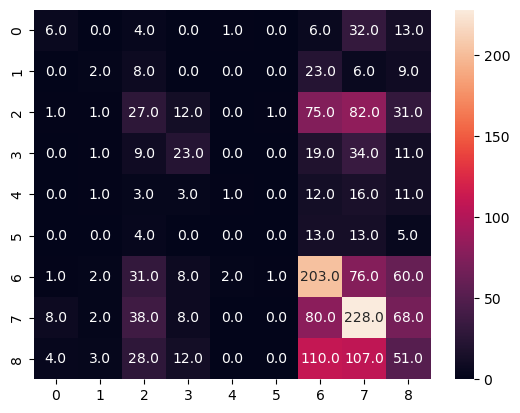

In [233]:
sns.heatmap(cm_model, annot=True, fmt=".1f")

# Confusion matrix for SOURCE

In [234]:
cm_model = confusion_matrix(y_test_decoded_SOURCE,lr_model_predicted_SOURCE)

In [235]:
cm_model

array([[634, 166],
       [116, 734]], dtype=int64)

<AxesSubplot:>

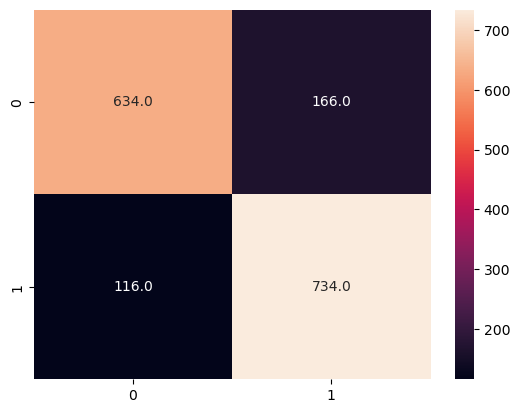

In [236]:
sns.heatmap(cm_model, annot=True, fmt=".1f")

In [237]:
 print("lr_bow_score :",lr_model_score_SOURCE)

lr_bow_score : 0.8290909090909091


# Confusion matrix for DESIGNATION

<AxesSubplot:>

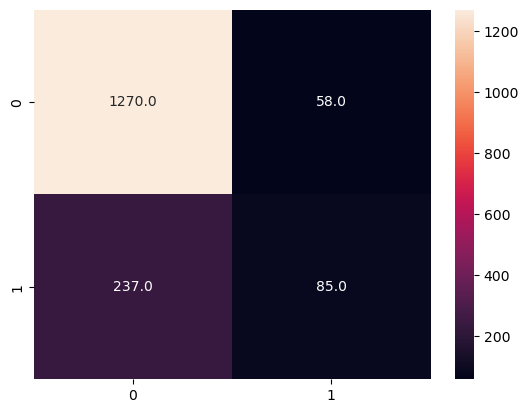

In [238]:
cm_model = confusion_matrix(y_test_decoded_DESIGNATION,lr_model_predicted_DESIGNATION)
cm_model
sns.heatmap(cm_model, annot=True, fmt=".1f")

# Confusion matrix for AUDIENCE

<AxesSubplot:>

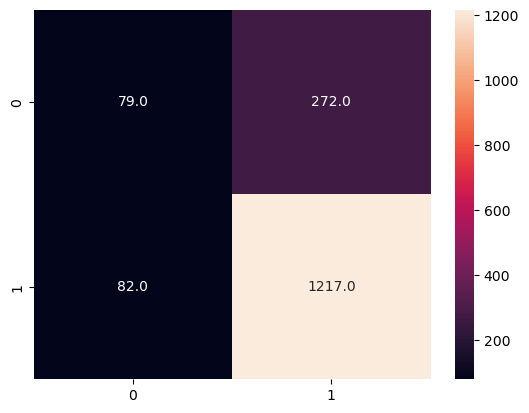

In [239]:
cm_model = confusion_matrix(y_test_decoded_AUDIENCE,lr_model_predicted_AUDIENCE)
cm_model
sns.heatmap(cm_model, annot=True, fmt=".1f")

# Confusion matrix for BIAS

<AxesSubplot:>

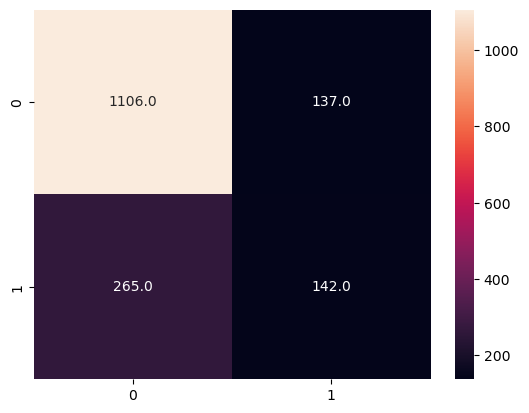

In [240]:
cm_model = confusion_matrix(y_test_decoded_BIAS,lr_model_predicted_BIAS)
cm_model
sns.heatmap(cm_model, annot=True, fmt=".1f")